# AOC 2022

Welcome to the Advent of Code 2022 !

## Basic configuration

In [ ]:
!pip install aocd

In [1]:
import os

os.environ['AOC_SESSION'] = open('session.txt').read().strip()

from aocd import submit
from aocd.models import Puzzle

## Day 12
https://adventofcode.com/2022/day/12
### Part 1

In [361]:
puzzle = Puzzle(2022, 12)
lines = puzzle.input_data.split('\n')

In [181]:
lines = """Sabqponm
abcryxxl
accszExk
acctuvwj
abdefghi""".split('\n')

In [362]:

for y, line in enumerate(lines):
    for x, c in enumerate(line):
        if c == 'S':
            start = (x, y)
        elif c == 'E':
            end = (x, y)
print(start, end)

(0, 20) (148, 20)


In [363]:
import numpy as np

hmap = np.array([[ord(c) - ord('a') for c in line] for line in lines]).T

In [364]:
hmap[start] = ord('a') - ord('a')
hmap[end] = ord('z') - ord('a')

In [365]:
function Dijkstra(Graph, source):
 2      
 3      for each vertex v in Graph.Vertices:
 4          dist[v] ← INFINITY
 5          prev[v] ← UNDEFINED
 6          add v to Q
 7      dist[source] ← 0
 8      
 9      while Q is not empty:
10          u ← vertex in Q with min dist[u]
11          remove u from Q
12          
13          for each neighbor v of u still in Q:
14              alt ← dist[u] + Graph.Edges(u, v)
15              if alt < dist[v]:
16                  dist[v] ← alt
17                  prev[v] ← u
18
19      return dist[], prev[]

SyntaxError: invalid syntax (<ipython-input-365-4213457c5f46>, line 1)

In [366]:
class Vertex:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.dist = 10**4
        self.prev = None
        self.visited = False
        
    def pos(self):
        return (self.x, self.y)
        
    def neighbors(self, hmap):
        candidates = [(self.x+1, self.y), (self.x-1, self.y), (self.x, self.y+1), (self.x, self.y-1)]
        return reachable(self.pos(), candidates, hmap)
    
class Queue:
    
    def __init__(self, values):
        self.list = list(values)
        
    def pop(self):
        return self.list.pop(0)
        
    def sort(self):
        self.list.sort(key=lambda v: v.dist)
        
    def empty(self):
        return len(self.list) == 0

def reachable(start, neighbors, hmap):
    on_map = [n for n in neighbors if valid(n, hmap)]
    return [v for v in on_map if hmap[v] <= hmap[start] + 1]

def valid(pos, hmap):
    H, W = hmap.shape
    return (0 <= pos[0] < H) & (0 <= pos[1] < W)
    
from collections import deque

def run_djikstra(start, hmap):

    nx, ny = hmap.shape
    verticies = [Vertex(x, y) for x in range(nx) for y in range(ny)]

    vmap = {(v.x, v.y): v for v in verticies}
    vmap[start].dist = 0

    queue = Queue(verticies)
    queue.sort()
    
    while not queue.empty():
        u = queue.pop()

        for v in [vmap[pos] for pos in u.neighbors(hmap)]:
            if not v.visited:
                dist = u.dist + 1
                if dist < v.dist:
                    v.dist = dist
                    v.prev = u
        u.visited = True
        queue.sort()
    
    return vmap

In [367]:
vmap = run_djikstra(start, hmap)

In [368]:
answer_a = vmap[end].dist

In [369]:
answer_a

490

In [342]:
hmap = hmap[80:, :]
end = (end[0] - 80, end[1])

In [343]:
from tqdm import tqdm

low_dist = []

xi, yi = np.where(hmap == 0)

for xo, yo in tqdm(zip(xi, yi)):
    vmap = run_djikstra((xo, yo), hmap)
    low_dist.append(vmap[end].dist)

989it [11:56,  1.38it/s]


In [337]:
end

(48, 20)

In [346]:
answer_b = min(low_dist)

In [347]:
answer_b

10000

In [348]:
low_dist

[10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,


In [267]:
roi.shape

(38, 41)

In [253]:
!pip install tqdm

  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)


In [169]:
l = [2, 3, 4]

l.pop(0)

2

In [170]:
l

[3, 4]

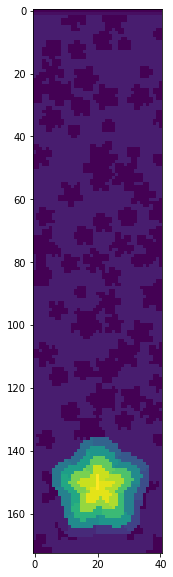

In [370]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

plt.imshow(hmap)

In [322]:
np.where(hmap[135:,:] == 0)

(array([], dtype=int64), array([], dtype=int64))

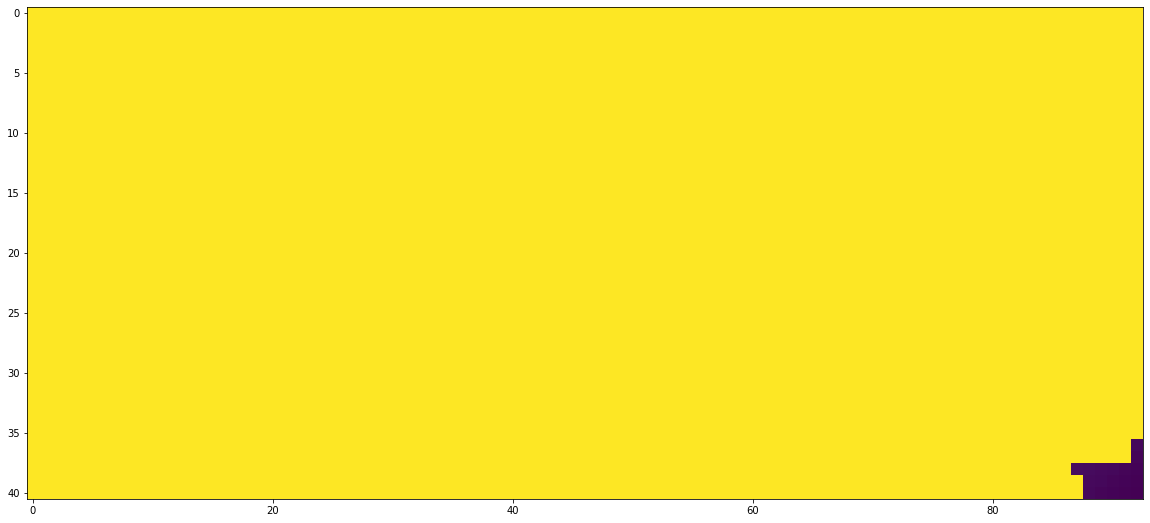

In [358]:
nx, ny = hmap.shape
d_map = np.array([[min(vmap[(x, y)].dist, 200) for x in range(nx)] for y in range(ny)])
plt.imshow(d_map)

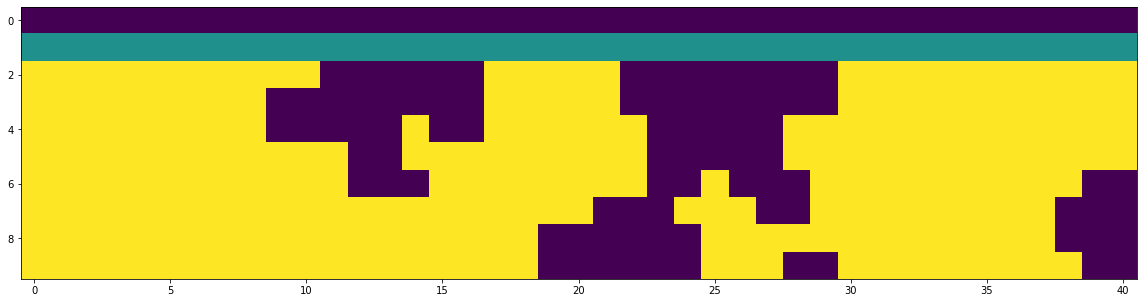

In [165]:
plt.imshow(hmap[:10,:])

## Day 11
https://adventofcode.com/2022/day/11
### Part 1

In [ ]:
puzzle = Puzzle(2022, 11)
lines = puzzle.input_data.split('\n\n')

In [ ]:
class Monkey:
    
    def __init__(self, description):
        self.items = list(map(int, description[1].split(': ')[1].split(', ')))
        self.operation = description[2].split(' = ')[1]
        self.test_value = int(description[3].split()[-1])
        self.test_true = int(description[4].split()[-1])
        self.test_false = int(description[5].split()[-1])
        self.business_level = 0
        
    def inspect(self, mod, divide=True):
        for old in self.items:
            worry = eval(self.operation) // 3 if divide else eval(self.operation)
            worry = worry % mod
            target = self.test_true if worry % self.test_value == 0 else self.test_false
            monkeys[target].items.append(worry)

        self.business_level += len(self.items)
        self.items = []

        
def init_monkeys():
    monkeys = []
    for line in lines:
        monkeys.append(Monkey(line.split('\n')))
    return monkeys

In [ ]:
ppmc = math.prod([monkey.test_value for monkey in monkeys])

monkeys = init_monkeys()

for i in range(20):
    for monkey in monkeys:
        monkey.inspect(mod=ppmc)

In [ ]:
import math

answer_a = math.prod(sorted([monkey.business_level for monkey in monkeys], reverse=True)[:2])

In [ ]:
puzzle.answer_a = answer_a

### Part 2

In [ ]:
ppmc = math.prod([monkey.test_value for monkey in monkeys])

monkeys = init_monkeys()

for i in range(10000):
    for monkey in monkeys:
        monkey.inspect(mod=ppmc, divide=False)

In [ ]:
answer_b = math.prod(sorted([monkey.business_level for monkey in monkeys], reverse=True)[:2])

In [ ]:
puzzle.answer_b = answer_b

## Day 10
https://adventofcode.com/2022/day/10
### Part 1

In [ ]:
puzzle = Puzzle(2022, 10)
lines = puzzle.input_data.split('\n')

In [ ]:
cycled = []
for line in lines:
    if line[0] == 'a':
        cycled.extend(['noop', line])
    else:
        cycled.append(line)

In [ ]:
X = 1

values = [X]

for ins in cycled:
    if ins[0] == 'a':
        X += int(ins.split()[1])
    values.append(X)

In [ ]:
answer_a = sum([cycle*values[cycle-1] for cycle in range(20, 220+1, 40)])

In [ ]:
puzzle.answer_a = answer_a

### Part 2

In [ ]:
import numpy as np

m = 40

screen = np.zeros((6, m))

for pos, val in enumerate(values[:-1]):
    l = pos // m
    r = pos % m
    screen[l, r] = 1 if abs(val - r) < 2 else 0

In [ ]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

plt.imshow(screen)

In [ ]:
answer_b = "RZEKEFHA"

In [ ]:
puzzle.answer_b = answer_b

## Day 9
https://adventofcode.com/2022/day/9
### Part 1

In [ ]:
puzzle = Puzzle(2022, 9)
lines = puzzle.input_data.split('\n')

In [ ]:
directions = []

for line in lines:
    a, b = line.split()
    directions.extend([a]*int(b))

In [ ]:
moves = {
    "D": (0, -1),
    "U": (0, 1),
    "L": (-1, 0),
    "R": (1, 0),
}

class Rope:
    
    def __init__(self):
        self.knots = []
        
    def add(self, knot):
        self.knots.append(knot)
        if len(self.knots) > 1:
            knot.link(self.knots[-2])
            
    def move(self, direction):
        self.knots[0].move(direction)
        for knot in self.knots[1:]:
            knot.follow()
            
    def head(self):
        return self.knots[0]
    
    def tail(self):
        return self.knots[-1]

class Knot:
    
    def __init__(self, x_=0, y_=0):
        self.x = x_
        self.y = y_
        self.next_ = None
        
    def pos(self):
        return self.x, self.y
        
    def link(self, other):
        self.next_ = other
        
    def move(self, direction):
        dx, dy = moves[direction]
        
        self.x += dx
        self.y += dy
        
    def follow(self):
        
        vx = self.next_.x - self.x
        vy = self.next_.y - self.y
        
        if max(abs(vx), abs(vy)) > 1:
            if abs(vx) > 0:
                self.x += int(vx/abs(vx))
            if abs(vy) > 0:
                self.y += int((vy)/abs(vy))
                
def move_rope(rope, directions):

    positions = {rope.tail().pos()}

    for direction in directions:
        rope.move(direction)

        positions.add(rope.tail().pos())
        
    return positions

In [ ]:
rope = Rope()
for i in range(2):
    rope.add(Knot())

answer_a = len(move_rope(rope, directions))

In [ ]:
puzzle.answer_a = answer_a

### Part 2

In [ ]:
rope = Rope()
for i in range(10):
    rope.add(Knot())
    
answer_b = len(move_rope(rope, directions))

In [ ]:
puzzle.answer_b = answer_b

### Extra

In [ ]:
import numpy as np
import cv2 as cv

resolution = (960, 540)

def draw_rope(rope, positions=None):
    img = np.zeros(resolution[::-1])
    
    img = cv.cvtColor(img.astype('uint8'), cv.COLOR_GRAY2BGR)
    
    mx, my = -200, -350
    
    for idx, k in enumerate(rope.knots):
        img[k.x - mx, k.y - my,:] = (255 - 3*idx, 0, 255 - 3*idx)
        
    if positions is not None:
        n = len(positions)
        
        for idx, (x, y) in enumerate(positions):
            img[x - mx, y - my,:] = (125, 0, int(255*idx / n))

    return img
    
def animate_rope(rope, directions):
    
    fourcc = cv.VideoWriter_fourcc(*'mp4v')
    out = cv.VideoWriter('day09.mp4', fourcc, 30.0, resolution)

    out.write(draw_rope(rope))

    positions = [rope.tail().pos()]
    
    for direction in directions:
        rope.move(direction)

        positions.append(rope.tail().pos())
        out.write(draw_rope(rope, positions))
    
    out.release()

In [ ]:
animate_rope(rope, directions)

## Day 8
https://adventofcode.com/2022/day/8
### Part 1

In [ ]:
puzzle = Puzzle(2022, 8)
lines = puzzle.input_data.split('\n')

In [ ]:
forest = np.array([list(map(int, line)) for line in lines])

In [ ]:
import numpy as np

def visibility(line):
    top = -1
    mask = []
    for item in line:
        mask.append(top)
        top = max(top, item)
    return line > np.array(mask)

In [ ]:
left = np.array([visibility(line) for line in forest])
right = np.array([visibility(line[::-1])[::-1] for line in forest])
top = np.array([visibility(line) for line in forest.T]).T
bottom = np.array([visibility(line[::-1])[::-1] for line in forest.T]).T

answer_a = np.sum(left | right | top | bottom)

In [ ]:
puzzle.answer_a = answer_a

### Part 2

In [ ]:
def los(line):
    if len(line) < 2:
        return 0
    
    top = line[0]
    
    for cnt, item in enumerate(line[1:]):
        if item >= top:
            break
    return cnt + 1

def viewing_score(x, y):
    # left, right, top, bottom
    return los(forest[y,x::-1]) * los(forest[y,x:]) * los(forest[y::-1,x]) * los(forest[y:,x])

In [ ]:
H, W = forest.shape
answer_b = max(viewing_score(x, y) for x in range(W) for y in range(H))

In [ ]:
puzzle.answer_b = answer_b

### Extra

In [ ]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(forest, cmap='YlGn')
ax1.set_title("Forest")

ax2.imshow(left | right | top | bottom)
ax2.set_title("Visible trees")

## Day 7
https://adventofcode.com/2022/day/7
### Part 1

In [ ]:
puzzle = Puzzle(2022, 7)
lines = puzzle.input_data.split('\n')

In [ ]:
from collections import deque, defaultdict
import re
import os

class File:
    
    def __init__(self, name_, size_):
        self._name = name_
        self._size = size_
        
    def size(self):
        return int(self._size)

class Directory:
    
    def __init__(self):
        self.dirs = []
        self.files = []
        
    def size(self):
        return sum(file_.size() for file_ in self.files) + sum(dir_.size() for dir_ in self.dirs)
    

In [ ]:
def current_path():
    return os.path.join(*list(path))

path = deque()
inodes = defaultdict(Directory)

for line in lines:
    if line[0] == '$':
        cmd = line[2:]
        if cmd[:2] == 'cd':
            loc = cmd[3:]
            if loc == '..':
                path.pop()
            else:
                path.append(loc)
    else:
        cur_path = current_path()

        if line[:3] == 'dir':
            dir_path = os.path.join(cur_path, line[4:])
            inodes[cur_path].dirs.append(inodes[dir_path])
        else:
            inodes[cur_path].files.append(File(*line.split()[::-1]))

In [ ]:
answer_a = sum(dir_.size() for dir_ in inodes.values() if dir_.size() <= 100000)

In [ ]:
puzzle.answer_a = answer_a

### Part 2

In [ ]:
total_space = 70000000
target_free_space = 30000000

min_space_to_free = target_free_space - (total_space - inodes['/'].size())

In [ ]:
answer_b = min(dir_.size() for dir_ in inodes.values() if dir_.size() >= min_space_to_free)

In [ ]:
puzzle.answer_b = answer_b

### Part 2

## Day 6
https://adventofcode.com/2022/day/6
### Part 1

In [ ]:
puzzle = Puzzle(2022, 6)
lines = puzzle.input_data.split('\n')

In [ ]:
line = lines[0]
for pos in range(4,len(line)):
    if len(set(line[pos-4:pos])) == 4:
        break

In [ ]:
puzzle.answer_a = pos

### Part 2

In [ ]:
line = lines[0]
for pos in range(14,len(line)):
    if len(set(line[pos-14:pos])) == 14:
        break

In [ ]:
puzzle.answer_b = pos

## Day 5
https://adventofcode.com/2022/day/5
### Part 1

In [ ]:
puzzle = Puzzle(2022, 5)
lines = puzzle.input_data.split('\n')

In [ ]:
from collections import deque, defaultdict
import re

def init_crates(lines):
    crates = defaultdict(deque)

    for offset, line in enumerate(lines):
        if line[1] == '1':
            break
        for idx, elem in enumerate(line[1::4]):
            if elem != ' ':
                crates[idx].appendleft(elem)
    
    instructions = []

    for line in lines[offset+2:]:
        m = re.match(r"move (\d+) from (\d+) to (\d+)", line)
        instructions.append(tuple(map(int, m.groups())))
    
    return crates, instructions

In [ ]:
crates, instructions = init_crates(lines)

for nb, src, dst in instructions:
    crates[dst-1].extend([crates[src-1].pop() for i in range(nb)])

In [ ]:
answer_a = ''.join([crates[idx][-1] for idx in range(9)])

In [ ]:
puzzle.answer_a = answer_a

### Part 2

In [ ]:
crates, instructions = init_crates(lines)

for nb, src, dst in instructions:
    crates[dst-1].extend([crates[src-1].pop() for i in range(nb)][::-1])

In [ ]:
answer_b = ''.join([crates[idx][-1] for idx in range(9)])

In [ ]:
puzzle.answer_b = answer_b

## Day 4
https://adventofcode.com/2022/day/4
### Part 1

In [ ]:
puzzle = Puzzle(2022, 4)
lines = puzzle.input_data.split('\n')

In [ ]:
ranges = []
for l in lines:
    pair = []
    for r in l.split(','):
        a, b = map(int, r.split('-'))
        pair.append(set(range(a,b+1)))
    ranges.append(pair)

In [ ]:
answer_a = len([r1 for r1, r2 in ranges if (r1 <= r2) or (r2 <= r1)])

In [ ]:
puzzle.answer_a = answer_a

### Part 2

In [ ]:
answer_b = len([r1 for r1, r2 in ranges if r1 & r2])

In [ ]:
puzzle.answer_b = answer_b

## Day 3
https://adventofcode.com/2022/day/3
### Part 1

In [ ]:
puzzle = Puzzle(2022, 3)
lines = puzzle.input_data.split('\n')

In [ ]:
from collections import Counter

sacks = [(Counter(l[:len(l)//2]), Counter(l[len(l)//2:])) for l in lines]

In [ ]:
def prio(c):
    if c.islower():
        return ord(c) - ord('a') + 1
    return ord(c) - ord('A') + 27

answer_a = sum(prio(list(s[0].keys() & s[1].keys())[0]) for s in sacks)

In [ ]:
puzzle.answer_a = answer_a

### Part 2

In [ ]:
sacks = [Counter(l) for l in lines]

answer_b = sum([prio(list(sacks[i].keys() & sacks[i+1].keys() & sacks[i+2].keys())[0]) for i in range(0, len(sacks), 3)])

In [ ]:
puzzle.answer_b = answer_b

## Day 2
https://adventofcode.com/2022/day/2
### Part 1

In [ ]:
puzzle = Puzzle(2022, 2)
lines = puzzle.input_data.split('\n')

In [ ]:
score = 0
for line in lines:
    a, b = line.split()
    a, b = ord(a) - ord('A'), ord(b) - ord('X')
    if a == b:
        score += 3
    if a == (b+1)%3:
        score += 0
    if a == (b+2)%3:
        score += 6
    score += b+1

In [ ]:
puzzle.answer_a = score

### Part 2

In [ ]:
## Short version
score = 0
for line in lines:
    a, b = line.split()
    a, b = ord(a) - ord('A'), ord(b) - ord('X')
    score += 3*b + 1 + (a + (b+2) % 3) % 3

In [ ]:
## Long version
score = 0
for line in lines:
    a, b = line.split()
    a, b = ord(a) - ord('A'), ord(b) - ord('X')
    
    score += 3*(b)

    score +=1
    if b == 0:
        score += (a+2)%3
    elif b==1:
        score += a
    elif b==2:
        score += (a+1)%3

In [ ]:
puzzle.answer_b = score

## Day 1
https://adventofcode.com/2022/day/1
### Part 1

In [ ]:
puzzle = Puzzle(2022, 1)

In [ ]:
lines = puzzle.input_data.split('\n\n')

In [ ]:
answer_a = max([sum(int(e) for e in l.split('\n')) for l in lines])

In [ ]:
puzzle.answer_a = answer_a

### Part 2

In [ ]:
answer_b = sum(sorted([sum(int(e) for e in l.split('\n')) for l in lines], reverse=True)[:3])

In [ ]:
puzzle.answer_b = answer_b